In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
data = pd.read_excel('rnd_contest_data.xlsx', sheet_name='REF raw data')

In [27]:
models = data['Model'].unique()
brands = data['Brand'].unique()
data['Date'] = data["Year"].map(str) + ' ' + data["Month"]
data['Date'] = pd.to_datetime(data['Date'])

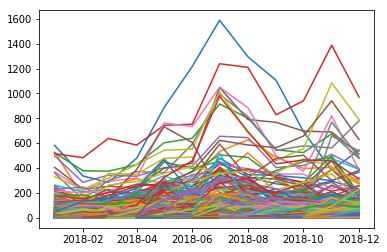

In [3]:
elast_data = ['Date', 'Model', 'Sales Units', 'PRICE USD/UN.', 'Brand']
traditional_data = data[data['Source']=='Traditional Sales']
traditional_data = traditional_data.loc[:,elast_data]
for mod in models:
    data_plot = traditional_data[traditional_data['Model']==mod]
    data_plot = data_plot.iloc[:, [0, 2]]
    plt.plot(data_plot.iloc[:, [0]], data_plot.iloc[:, [1]])

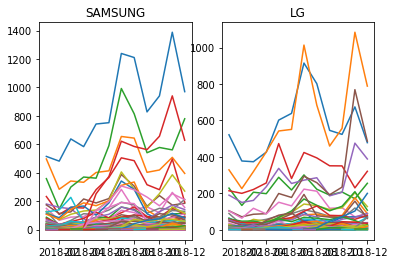

<Figure size 864x432 with 0 Axes>

In [4]:
elast_data = ['Date', 'Model', 'Sales Units', 'PRICE USD/UN.', 'Brand']
traditional_data = data[data['Source']=='Traditional Sales']
traditional_data = traditional_data.loc[:,elast_data]
fig, axes = plt.subplots(1, 2)
plt.figure(figsize=(12,6))
LG_data = traditional_data[traditional_data["Brand"]=='LG']
models_lg = LG_data['Model'].unique()
for mod in models_lg:
    LG_data_plot = LG_data[LG_data['Model']==mod]
    LG_data_plot = LG_data_plot.iloc[:, [0, 2]]
    axes[1].set_title('LG')
    axes[1].plot(LG_data_plot.iloc[:, [0]], LG_data_plot.iloc[:, [1]])

SAM_data = traditional_data[traditional_data["Brand"]=='SAMSUNG']
models_sam = SAM_data['Model'].unique()
for mod in models_sam:
    SAM_data_plot = SAM_data[SAM_data['Model']==mod]
    SAM_data_plot = SAM_data_plot.iloc[:, [0, 2]]
    axes[0].set_title('SAMSUNG')
    axes[0].plot(SAM_data_plot.iloc[:, [0]], SAM_data_plot.iloc[:, [1]])


In [5]:
X_R1 = LG_data.iloc[:, [3]]
y_R1 = LG_data.iloc[:, [2]]

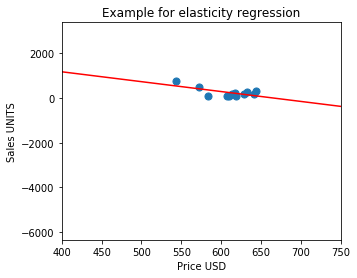

In [6]:
LG_data_elast=LG_data[LG_data['Model']==models_lg[5]]
X_R2 = LG_data_elast.iloc[:, [3]]
y_R2 = LG_data_elast.iloc[:, [2]]
linreg_pol = LinearRegression().fit(X_R2, y_R2)
X_plot=np.linspace(0,2000,1000).reshape(-1,1)
plt.figure(figsize=(5,4))
plt.scatter(X_R2, y_R2, marker= 'o', s=50)
plt.plot(X_plot, linreg_pol.predict(X_plot), 'r-')
plt.xlabel('Price USD')
plt.ylabel('Sales UNITS')
plt.xlim(400, 750)
plt.title("Example for elasticity regression (Traditional Sales)")
plt.show()

In [21]:
с=0
s=[]
elas=[]
for brand in brands:
    brand_data = traditional_data[traditional_data["Brand"]==brand]
    models_brand = brand_data['Model'].unique()
    lenn = len(models_brand)
    if lenn>1:
        for mod in models_brand:
            brand_data_elast = brand_data[brand_data['Model']==mod]
            leng = len(brand_data_elast)
            if leng > 6:
                X_R4 = brand_data_elast.iloc[:, [3]]
                y_R4 = brand_data_elast.iloc[:, [2]]
                linreg_pol = LinearRegression().fit(X_R4, y_R4)
                c+=linreg_pol.coef_
                s.append(linreg_pol.coef_)
        print(brand, "---", c/lenn)
    c=0
print(" AVG Elasticity for all models > 6 months (traditional) =  ",np.mean(s))

INDESIT --- [[-0.24843194]]
WHIRLPOOL --- [[-0.0066436]]
LG --- [[-0.00021786]]
SAMSUNG --- [[-0.02371423]]
BOSCH --- [[-0.06074595]]
ELENBERG --- [[-0.22098384]]
DELFA --- [[-0.06161157]]
VESTFROST --- [[-0.28848307]]
ATLANT --- [[0.12547654]]
BEKO --- [[0.02192563]]
ZANUSSI --- [[0.05951673]]
SNAIGE --- [[0.01194116]]
CANDY --- [[-0.0447583]]
GORENJE --- [[-0.01209071]]
SIEMENS --- [[-0.07144308]]
LIEBHERR --- [[-5.44039623e-05]]
ERGO --- [[-0.41915751]]
SHARP --- [[0.00456338]]
HOTPOINT-ARIS --- [[0.04164529]]
NORD --- [[-0.03058334]]
SATURN --- [[-0.05586881]]
LIBERTY --- [[0.03357087]]
SMART --- [[-0.02237437]]
ELECTROLUX --- [[0.00218271]]
HITACHI --- [[-0.00450028]]
DNEPR --- [[-0.2263724]]
KIVI --- [[-0.05914811]]
LIBERTON --- [[0.07966213]]
MILANO --- [[-0.02064351]]
MIRTA --- 0.0
ROTEX --- [[0.19610208]]
HAIER --- [[0.0301636]]
PROFYCOOL --- [[0.14316667]]
AEG --- [[-0.00355201]]
HANSA --- [[-0.04177364]]
ARDO --- 0.0
HISENSE --- [[-0.08701585]]
MYSTERY --- 0.0
MPM --- 0.0
SW

In [30]:
с=0
s=[]
elas=[]
Inet_data = data[data['Source']=='Internet Sales']
Inet_data = Inet_data.loc[:,elast_data]
for brand in brands:
    brand_data = Inet_data[traditional_data["Brand"]==brand]
    models_brand = brand_data['Model'].unique()
    lenn = len(models_brand)
    if lenn>1:
        for mod in models_brand:
            brand_data_elast = brand_data[brand_data['Model']==mod]
            leng = len(brand_data_elast)
            if leng > 6:
                X_R4 = brand_data_elast.iloc[:, [3]]
                y_R4 = brand_data_elast.iloc[:, [2]]
                linreg_pol = LinearRegression().fit(X_R4, y_R4)
                c+=linreg_pol.coef_
                s.append(linreg_pol.coef_)
        print(brand, "---", c/lenn)
    c=0
print(" AVG Elasticity for all models > 6 months (Internet) =  ",np.mean(s))

INDESIT --- [[-0.16558415]]
WHIRLPOOL --- [[-0.0238602]]
LG --- [[-0.05122193]]
SAMSUNG --- [[-0.05138059]]
BOSCH --- [[-0.06993165]]
ELENBERG --- [[-0.45626174]]
DELFA --- [[0.07911062]]
VESTFROST --- [[-0.19349885]]
ATLANT --- [[0.00553559]]
BEKO --- [[-0.03410205]]
ZANUSSI --- [[-0.09955864]]
SNAIGE --- [[-0.13627159]]
CANDY --- [[-0.08718609]]
GORENJE --- [[-0.02157799]]
SIEMENS --- [[-0.02679808]]
LIEBHERR --- [[-0.01904205]]
ERGO --- [[0.4660281]]
SHARP --- [[0.00756547]]
HOTPOINT-ARIS --- [[-0.03000141]]
NORD --- [[-0.03078662]]
SATURN --- [[-0.20039677]]
LIBERTY --- [[-0.04057378]]
SMART --- 0.0
ELECTROLUX --- [[-0.00837115]]
HITACHI --- [[-0.00261937]]
KIVI --- 0.0
LIBERTON --- [[-0.01728083]]
MILANO --- 0.0
MIRTA --- [[-0.51113752]]
ROTEX --- [[0.48540173]]
HAIER --- [[-0.01555342]]
PROFYCOOL --- [[0.43091672]]
AEG --- 0.0
HANSA --- [[-0.52306779]]
HISENSE --- 0.0
MYSTERY --- [[-0.0294116]]
MPM --- 0.0
SWIZER --- 0.0
DIGITAL --- 0.0
MIELE --- 0.0
PRIME TECHNIC --- [[-0.088732

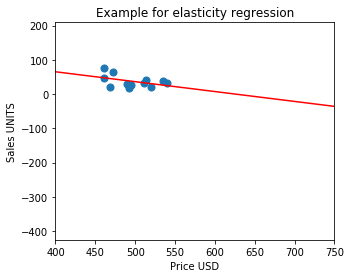

In [31]:
LG_data_Inet = Inet_data[traditional_data["Brand"]=='LG']
models_lg = LG_data_Inet['Model'].unique()
LG_data_elast=LG_data_Inet[LG_data_Inet['Model']==models_lg[5]]
X_R2 = LG_data_elast.iloc[:, [3]]
y_R2 = LG_data_elast.iloc[:, [2]]
linreg_pol = LinearRegression().fit(X_R2, y_R2)
X_plot=np.linspace(0,2000,1000).reshape(-1,1)
plt.figure(figsize=(5,4))
plt.scatter(X_R2, y_R2, marker= 'o', s=50)
plt.plot(X_plot, linreg_pol.predict(X_plot), 'r-')
plt.xlabel('Price USD')
plt.ylabel('Sales UNITS')
plt.xlim(400, 750)
plt.title("Example for elasticity regression (Internet Sales)")
plt.show()